In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 2 * np.random.random(100) #随机生成100个点
y = 3. * x + 4. + np.random.normal(size=100) # 3x+4再加上一个正态分布的噪音

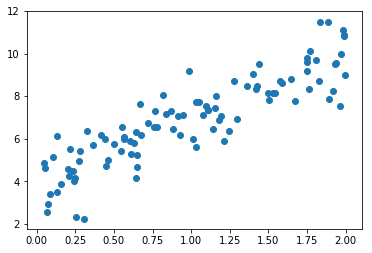

In [3]:
plt.scatter(x, y)

In [5]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

In [6]:
y.shape

(100,)

### 使用梯度下降法训练
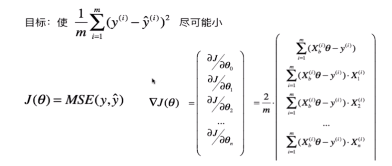

In [10]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float("inf")

In [19]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [20]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon):
            break
        
        cur_iter += 1
        
    return theta

In [23]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [24]:
theta

array([3.93800447, 3.01397246])